# Import Library

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec  # Import for more control over layout
import seaborn as sns
from scipy.stats import pearsonr

In [63]:
print("Kolom di Spotify 2024:")
print(spotify2024_df.columns)

print("\nKolom di Spotify 2023:")
print(spotify2023_df.columns)


Kolom di Spotify 2024:
Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

Kolom di Spotify 2023:
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 

# Data Gathering

In [11]:
# Membaca dataset
spotify2024_df = pd.read_csv("dataset/Most Streamed Spotify Songs 2024 data.csv", encoding='latin1')
spotify2023_df = pd.read_csv("dataset/Most Streamed Spotify Songs 2023 data.csv", encoding='latin1')

# Menggabungkan kedua dataset berdasarkan kolom yang relevan
spotify_combined_df = pd.merge(
    left=spotify2024_df,
    right=spotify2023_df,
    left_on='Track',         # Kolom di DataFrame 2024
    right_on='track_name',   # Kolom di DataFrame 2023
    how='outer',             # Menggunakan outer join untuk memasukkan semua data
    suffixes=('_2024', '_2023')  # Menambahkan suffix untuk kolom yang sama
)

# Memilih kolom yang ingin ditampilkan dan menambah nama tahun
comparison_columns = [
    'Track', 'Artist', 'Album Name', 'Release Date', 'Spotify Streams', 
    'Spotify Popularity', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'track_name', 'artist(s)_name', 'streams', 'released_year', 
    'released_month', 'released_day'
]

# Menyaring DataFrame untuk kolom yang relevan
spotify_comparison_df = spotify_combined_df[comparison_columns]

# Menampilkan hasil gabungan yang rapi
print(spotify_comparison_df.head())  # Tampilkan beberapa baris pertama dari DataFrame yang digabung


                                               Track        Artist  \
0        "Slut!" (Taylor's Version) (From The Vault)  Taylor Swift   
1  "ýýýýýý ýýýýýýýýýý "ýýýýýýýýýýýý ýýýý ýýýýýýýý...  Myriam Fares   
2                                 #BrooklynBloodPop!          SyKo   
3                                     'Til You Can't  Cody Johnson   
4                                   'Till I Collapse        Eminem   

                                          Album Name Release Date  \
0                            1989 (Taylor's Version)   10/26/2023   
1  "ýýýýýý ýýýýýýýýýý "ýýýýýýýýýýýý ýýýý ýýýýýýýý...    3/10/2022   
2                                 #BrooklynBloodPop!    7/27/2020   
3             'Til You Canï¿½ï¿½ï¿½t / Longer Than S    6/11/2021   
4                                    The Eminem Show    5/26/2002   

  Spotify Streams  Spotify Popularity Spotify Playlist Count  \
0     265,932,119                 NaN                 15,133   
1       7,383,901                48.

# Assesing Data

## Missing Value Checking

In [12]:
spotify_comparison_df = spotify_combined_df[comparison_columns]

# Memeriksa nilai yang hilang
missing_values = spotify_comparison_df.isnull().sum()

# Menampilkan hasil
print("Jumlah Missing Values per Kolom:")
print(missing_values[missing_values > 0])  # Hanya menampilkan kolom dengan missing values

Jumlah Missing Values per Kolom:
Track                      280
Artist                     285
Album Name                 280
Release Date               280
Spotify Streams            393
Spotify Popularity        1088
Spotify Playlist Count     350
Spotify Playlist Reach     352
track_name                3852
artist(s)_name            3852
streams                   3852
released_year             3852
released_month            3852
released_day              3852
dtype: int64


## Duplicated Checking

In [13]:
# Memeriksa duplikasi
duplicate_count = spotify_comparison_df.duplicated().sum()

# Menampilkan hasil
print("\nJumlah Duplicates:", duplicate_count)



Jumlah Duplicates: 2


## Data Cleaning

In [14]:
spotify_comparison_df = spotify_combined_df[comparison_columns]

# Pembersihan data: Menghapus nilai null dan NaN
spotify_cleaned_df = spotify_comparison_df.dropna()

# Menampilkan hasil setelah pembersihan nilai null dan NaN
print("Data setelah menghapus nilai null dan NaN:")
print(spotify_cleaned_df.head())  # Menampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan

Data setelah menghapus nilai null dan NaN:
                           Track     Artist                    Album Name  \
4               'Till I Collapse     Eminem               The Eminem Show   
5   (It Goes Like) Nanana - Edit  Peggy Gou  (It Goes Like) Nanana [Edit]   
16    10 Things I Hate About You  Leah Kate    10 Things I Hate About You   
21                         10:35    Tiï¿½ï¿                         10:35   
25       2 Be Loved (Am I Ready)      Lizzo                       Special   

   Release Date Spotify Streams  Spotify Popularity Spotify Playlist Count  \
4     5/26/2002   1,958,809,069                79.0                282,888   
5     6/15/2023     460,156,070                77.0                163,449   
16    3/23/2022     238,502,829                 4.0                 38,595   
21    11/3/2022     539,802,784                74.0                 82,093   
25    7/15/2022     335,194,737                62.0                 36,991   

   Spotify Playlist Reach

In [15]:
# Memeriksa dan menghapus duplikasi
initial_shape = spotify_cleaned_df.shape  # Menyimpan bentuk awal DataFrame
spotify_cleaned_df = spotify_cleaned_df.drop_duplicates()

# Menampilkan hasil setelah pembersihan duplikasi
final_shape = spotify_cleaned_df.shape  # Menyimpan bentuk akhir DataFrame
duplicates_removed = initial_shape[0] - final_shape[0]  # Menghitung jumlah duplikat yang dihapus

print("\nJumlah Duplicates yang dihapus:", duplicates_removed)
print("Data setelah menghapus duplikasi:")
print(spotify_cleaned_df.head())  # Menampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan



Jumlah Duplicates yang dihapus: 0
Data setelah menghapus duplikasi:
                           Track     Artist                    Album Name  \
4               'Till I Collapse     Eminem               The Eminem Show   
5   (It Goes Like) Nanana - Edit  Peggy Gou  (It Goes Like) Nanana [Edit]   
16    10 Things I Hate About You  Leah Kate    10 Things I Hate About You   
21                         10:35    Tiï¿½ï¿                         10:35   
25       2 Be Loved (Am I Ready)      Lizzo                       Special   

   Release Date Spotify Streams  Spotify Popularity Spotify Playlist Count  \
4     5/26/2002   1,958,809,069                79.0                282,888   
5     6/15/2023     460,156,070                77.0                163,449   
16    3/23/2022     238,502,829                 4.0                 38,595   
21    11/3/2022     539,802,784                74.0                 82,093   
25    7/15/2022     335,194,737                62.0                 36,991   


In [16]:
# Memeriksa nilai yang hilang setelah pembersihan
missing_values_after_cleaning = spotify_cleaned_df.isnull().sum()

# Memeriksa duplikasi setelah pembersihan
duplicate_count_after_cleaning = spotify_cleaned_df.duplicated().sum()

# Menampilkan hasil
print("Jumlah Missing Values per Kolom setelah Pembersihan:")
print(missing_values_after_cleaning[missing_values_after_cleaning > 0])  # Hanya menampilkan kolom dengan missing values

print("\nJumlah Duplicates setelah Pembersihan:", duplicate_count_after_cleaning)


Jumlah Missing Values per Kolom setelah Pembersihan:
Series([], dtype: int64)

Jumlah Duplicates setelah Pembersihan: 0


# Measure Central Tendency

In [29]:
print("Beberapa baris pertama dari DataFrame:")
print(spotify_cleaned_df.head())  # Menampilkan 5 baris pertama dari DataFrame

Beberapa baris pertama dari DataFrame:
                           Track     Artist                    Album Name  \
4               'Till I Collapse     Eminem               The Eminem Show   
5   (It Goes Like) Nanana - Edit  Peggy Gou  (It Goes Like) Nanana [Edit]   
16    10 Things I Hate About You  Leah Kate    10 Things I Hate About You   
21                         10:35    Tiï¿½ï¿                         10:35   
25       2 Be Loved (Am I Ready)      Lizzo                       Special   

   Release Date Spotify Streams  Spotify Popularity Spotify Playlist Count  \
4     5/26/2002   1,958,809,069                79.0                282,888   
5     6/15/2023     460,156,070                77.0                163,449   
16    3/23/2022     238,502,829                 4.0                 38,595   
21    11/3/2022     539,802,784                74.0                 82,093   
25    7/15/2022     335,194,737                62.0                 36,991   

   Spotify Playlist Reach    

In [30]:
# Mengambil kolom numerik dari DataFrame
numeric_columns = spotify_cleaned_df.select_dtypes(include='number').columns

# Menghitung mean, median, dan mode untuk setiap kolom numerik
mean_values = spotify_cleaned_df[numeric_columns].mean()
median_values = spotify_cleaned_df[numeric_columns].median()
mode_values = spotify_cleaned_df[numeric_columns].mode().iloc[0]  # Mengambil mode dari setiap kolom

# Menampilkan hasil
print("Mean (Rata-rata) dari Kolom Numerik:")
print(mean_values)

print("\nMedian (Nilai Tengah) dari Kolom Numerik:")
print(median_values)

print("\nMode (Nilai Paling Sering Muncul) dari Kolom Numerik:")
print(mode_values)

Mean (Rata-rata) dari Kolom Numerik:
Spotify Popularity      69.196477
released_year         2020.372629
released_month           6.024390
released_day            14.569106
dtype: float64

Median (Nilai Tengah) dari Kolom Numerik:
Spotify Popularity      71.0
released_year         2022.0
released_month           5.0
released_day            14.0
dtype: float64

Mode (Nilai Paling Sering Muncul) dari Kolom Numerik:
Spotify Popularity      68.0
released_year         2022.0
released_month           5.0
released_day             1.0
Name: 0, dtype: float64


# Measuring Dispersion

In [32]:
# Membaca dataset (gunakan dataset yang sudah dibersihkan)
# spotify_cleaned_df sudah ada dari langkah sebelumnya

# Memeriksa isi dari DataFrame untuk memastikan kolom yang ada
print("Beberapa baris pertama dari DataFrame:")
print(spotify_cleaned_df.head())  # Menampilkan 5 baris pertama dari DataFrame



Beberapa baris pertama dari DataFrame:
                           Track     Artist                    Album Name  \
4               'Till I Collapse     Eminem               The Eminem Show   
5   (It Goes Like) Nanana - Edit  Peggy Gou  (It Goes Like) Nanana [Edit]   
16    10 Things I Hate About You  Leah Kate    10 Things I Hate About You   
21                         10:35    Tiï¿½ï¿                         10:35   
25       2 Be Loved (Am I Ready)      Lizzo                       Special   

   Release Date Spotify Streams  Spotify Popularity Spotify Playlist Count  \
4     5/26/2002   1,958,809,069                79.0                282,888   
5     6/15/2023     460,156,070                77.0                163,449   
16    3/23/2022     238,502,829                 4.0                 38,595   
21    11/3/2022     539,802,784                74.0                 82,093   
25    7/15/2022     335,194,737                62.0                 36,991   

   Spotify Playlist Reach    

In [33]:
# Mengambil kolom numerik dari DataFrame
numeric_columns = spotify_cleaned_df.select_dtypes(include='number').columns

# Menghitung ukuran sebaran
range_values = spotify_cleaned_df[numeric_columns].max() - spotify_cleaned_df[numeric_columns].min()
variance_values = spotify_cleaned_df[numeric_columns].var()
std_deviation_values = spotify_cleaned_df[numeric_columns].std()

# Menampilkan hasil
print("Rentang (Range) dari Kolom Numerik:")
print(range_values)

print("\nVarians (Variance) dari Kolom Numerik:")
print(variance_values)

print("\nDeviasi Standar (Standard Deviation) dari Kolom Numerik:")
print(std_deviation_values)


Rentang (Range) dari Kolom Numerik:
Spotify Popularity    87.0
released_year         48.0
released_month        11.0
released_day          30.0
dtype: float64

Varians (Variance) dari Kolom Numerik:
Spotify Popularity    124.597708
released_year          22.155396
released_month         11.744316
released_day           84.332396
dtype: float64

Deviasi Standar (Standard Deviation) dari Kolom Numerik:
Spotify Popularity    11.162334
released_year          4.706952
released_month         3.426998
released_day           9.183267
dtype: float64


# IQR

In [34]:

# Mengambil kolom numerik dari DataFrame
numeric_columns = spotify_cleaned_df.select_dtypes(include='number').columns

# Menghitung Q1 dan Q3 untuk setiap kolom numerik
Q1 = spotify_cleaned_df[numeric_columns].quantile(0.25)
Q3 = spotify_cleaned_df[numeric_columns].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menampilkan hasil
print("Kuartil Pertama (Q1) dari Kolom Numerik:")
print(Q1)

print("\nKuartil Ketiga (Q3) dari Kolom Numerik:")
print(Q3)

print("\nInterquartile Range (IQR) dari Kolom Numerik:")
print(IQR)

Kuartil Pertama (Q1) dari Kolom Numerik:
Spotify Popularity      66.0
released_year         2021.0
released_month           3.0
released_day             6.0
Name: 0.25, dtype: float64

Kuartil Ketiga (Q3) dari Kolom Numerik:
Spotify Popularity      76.0
released_year         2022.0
released_month           9.0
released_day            22.0
Name: 0.75, dtype: float64

Interquartile Range (IQR) dari Kolom Numerik:
Spotify Popularity    10.0
released_year          1.0
released_month         6.0
released_day          16.0
dtype: float64


# Visualisasi

In [37]:

# Menghitung nilai tendency dan dispersion
mean_values = spotify_cleaned_df[numeric_columns].mean()
median_values = spotify_cleaned_df[numeric_columns].median()
mode_values = spotify_cleaned_df[numeric_columns].mode().iloc[0]
variance_values = spotify_cleaned_df[numeric_columns].var()
std_dev_values = spotify_cleaned_df[numeric_columns].std()


# Menghitung Q1 dan Q3 untuk IQR
Q1 = spotify_cleaned_df[numeric_columns].quantile(0.25)
Q3 = spotify_cleaned_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(24, 8))

<Figure size 2400x800 with 0 Axes>

<Figure size 2400x800 with 0 Axes>

## Visualisasi Measure Central Tendency

C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\2157652860.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(mean_values[i] + 0.05, i, f'{mean_values[i]:.2f}', color='blue', va='center')
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\2157652860.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(median_values[i] + 0.05, i + bar_height, f'{median_values[i]:.2f}', color='orange', va='center')
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\2157652860.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as

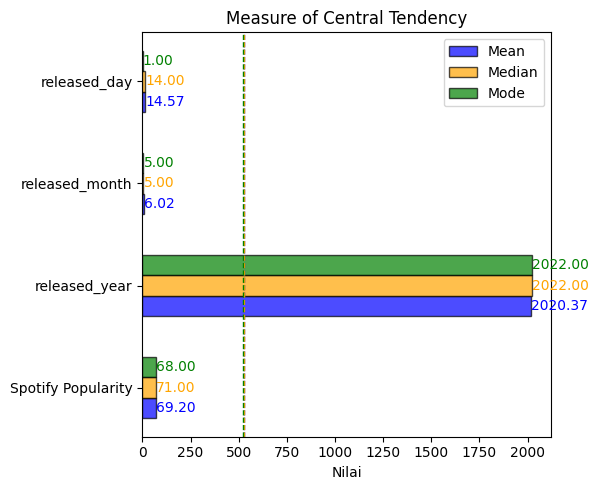

In [52]:
# Atur ukuran figure
plt.figure(figsize=(15, 5))

# Visualisasi untuk Measure of Central Tendency
plt.subplot(1, 3, 1)
bar_height = 0.2  # Tinggi bar
y = range(len(numeric_columns))

# Plot Mean, Median, Mode sebagai bar horizontal terpisah
plt.barh(y, mean_values, height=bar_height, color='blue', alpha=0.7, label='Mean', edgecolor='black')
plt.barh([p + bar_height for p in y], median_values, height=bar_height, color='orange', alpha=0.7, label='Median', edgecolor='black')
plt.barh([p + bar_height * 2 for p in y], mode_values, height=bar_height, color='green', alpha=0.7, label='Mode', edgecolor='black')

plt.yticks([p + bar_height for p in y], numeric_columns)  # Sesuaikan posisi y
plt.title('Measure of Central Tendency')
plt.xlabel('Nilai')
plt.legend()

# Menambahkan label untuk setiap bar
for i in range(len(numeric_columns)):
    plt.text(mean_values[i] + 0.05, i, f'{mean_values[i]:.2f}', color='blue', va='center')
    plt.text(median_values[i] + 0.05, i + bar_height, f'{median_values[i]:.2f}', color='orange', va='center')
    plt.text(mode_values[i] + 0.05, i + bar_height * 2, f'{mode_values[i]:.2f}', color='green', va='center')

# Menambahkan garis horizontal untuk mean, median, dan mode
plt.axvline(mean_values.mean(), color='blue', linestyle='--', linewidth=1, label='Mean Line')
plt.axvline(median_values.mean(), color='orange', linestyle='--', linewidth=1, label='Median Line')
plt.axvline(mode_values.mean(), color='green', linestyle='--', linewidth=1, label='Mode Line')

# Menampilkan grafik
plt.tight_layout()
plt.show()

## Visualisasi untuk Dispersion

C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\3185632179.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(variance_values[i] + 0.05, i, f'{variance_values[i]:.2f}', color='green', va='center')
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\3185632179.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(std_dev_values[i] + 0.05, i + bar_height, f'{std_dev_values[i]:.2f}', color='red', va='center')
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\3185632179.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be tr

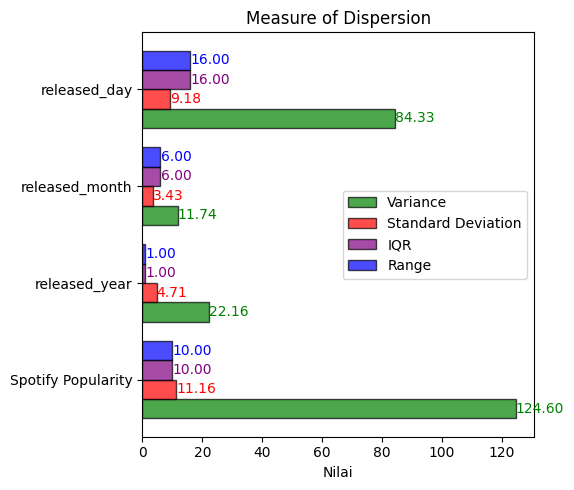

In [49]:

# Atur ukuran figure
plt.figure(figsize=(15, 5))

# Visualisasi untuk Measure of Dispersion
plt.subplot(1, 3, 2)
bar_height = 0.2  # Tinggi bar
y = range(len(numeric_columns))

# Plot Variance, Standard Deviation, IQR dan Range sebagai bar horizontal terpisah
plt.barh(y, variance_values, height=bar_height, color='green', alpha=0.7, label='Variance', edgecolor='black')
plt.barh([p + bar_height for p in y], std_dev_values, height=bar_height, color='red', alpha=0.7, label='Standard Deviation', edgecolor='black')
plt.barh([p + bar_height * 2 for p in y], IQR, height=bar_height, color='purple', alpha=0.7, label='IQR', edgecolor='black')
plt.barh([p + bar_height * 3 for p in y], Q3 - Q1, height=bar_height, color='blue', alpha=0.7, label='Range', edgecolor='black')

plt.yticks([p + 1.5 * bar_height for p in y], numeric_columns)  # Sesuaikan posisi y
plt.title('Measure of Dispersion')
plt.xlabel('Nilai')
plt.legend()

# Menambahkan label untuk setiap bar
for i in range(len(numeric_columns)):
    plt.text(variance_values[i] + 0.05, i, f'{variance_values[i]:.2f}', color='green', va='center')
    plt.text(std_dev_values[i] + 0.05, i + bar_height, f'{std_dev_values[i]:.2f}', color='red', va='center')
    plt.text(IQR[i] + 0.05, i + bar_height * 2, f'{IQR[i]:.2f}', color='purple', va='center')
    plt.text((Q3[i] - Q1[i]) + 0.05, i + bar_height * 3, f'{Q3[i] - Q1[i]:.2f}', color='blue', va='center')

# Menampilkan grafik
plt.tight_layout()
plt.show()

## IQR BloxPlot

C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\1341208542.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\1341208542.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\1341208542.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\1341208542.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

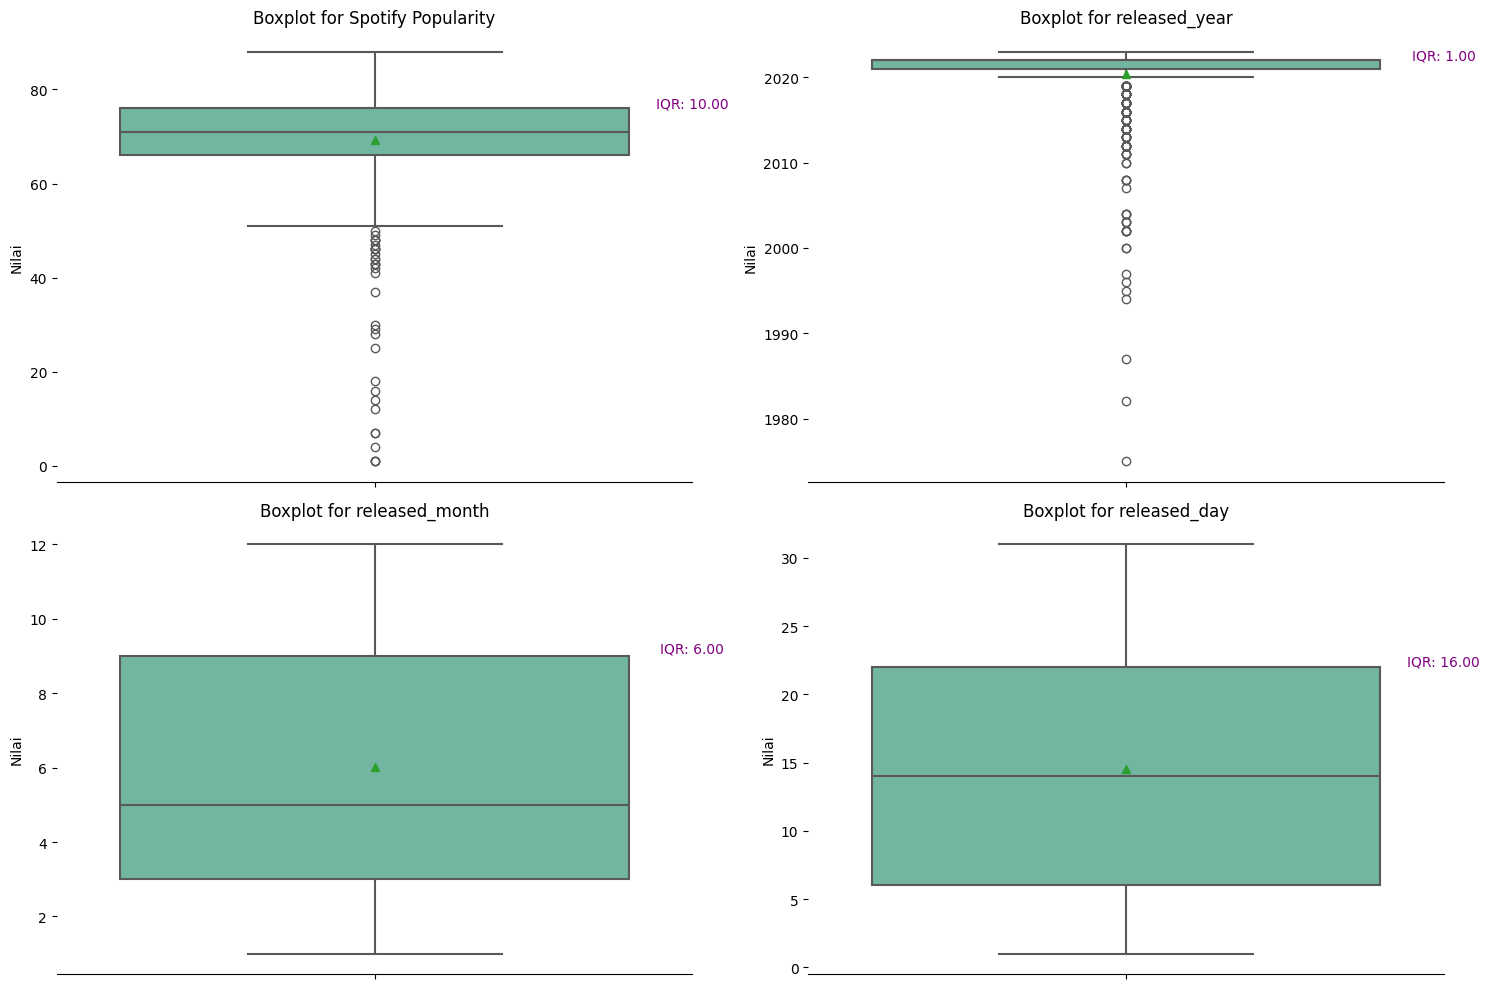

In [57]:

# Kolom yang ingin ditampilkan
columns_to_plot = ['Spotify Popularity', 'released_year', 'released_month', 'released_day']

# Atur ukuran figure
plt.figure(figsize=(15, 10))

# Loop untuk membuat boxplot untuk setiap kolom
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)  # Membagi plot menjadi 2x2
    sns.boxplot(
        y=spotify_cleaned_df[column],
        palette='Set2',
        showmeans=True,  # Menampilkan mean sebagai titik
        linewidth=1.5,  # Mengatur ketebalan garis boxplot
    )
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Nilai')

    # Menonaktifkan anotasi default dari Seaborn
    sns.despine(top=True, right=True, left=True)

    # Menambahkan anotasi untuk IQR secara manual
    Q1_value = spotify_cleaned_df[column].quantile(0.25)
    Q3_value = spotify_cleaned_df[column].quantile(0.75)
    IQR_value = Q3_value - Q1_value
    plt.text(0.5, Q3_value + 0.1, f'IQR: {IQR_value:.2f}', color='purple', ha='center')

plt.tight_layout()
plt.show()

# Analisis Korelasi

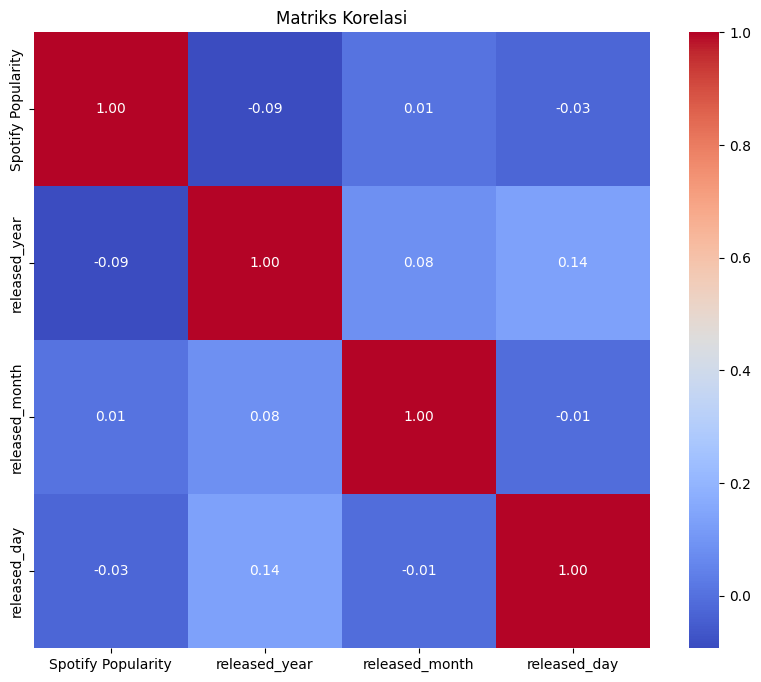

P-values dari Uji Signifikansi Korelasi:
                   Spotify Popularity released_year released_month  \
Spotify Popularity                NaN      0.011394       0.853871   
released_year                0.011394           NaN       0.021594   
released_month               0.853871      0.021594            NaN   
released_day                 0.493651      0.000195       0.789558   

                   released_day  
Spotify Popularity     0.493651  
released_year          0.000195  
released_month         0.789558  
released_day                NaN  


In [60]:

# Menggunakan dataset yang sudah dibersihkan (spotify_cleaned_df)
# Mengambil kolom numerik untuk analisis korelasi
numeric_columns = spotify_cleaned_df.select_dtypes(include='number').columns

# 1. Menghitung matriks korelasi
correlation_matrix = spotify_cleaned_df[numeric_columns].corr()

# 2. Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

# 3. Uji Signifikansi: Melakukan uji Pearson untuk setiap pasangan kolom
p_values = pd.DataFrame(index=numeric_columns, columns=numeric_columns)

for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1 != col2:
            _, p_value = pearsonr(spotify_cleaned_df[col1].dropna(), spotify_cleaned_df[col2].dropna())
            p_values.loc[col1, col2] = p_value
        else:
            p_values.loc[col1, col2] = np.nan  # Mengisi diagonal dengan NaN

# Menampilkan p-values
print("P-values dari Uji Signifikansi Korelasi:")
print(p_values)

# Menyimpan matriks korelasi dan p-values jika diperlukan
correlation_matrix.to_csv('correlation_matrix.csv')
p_values.to_csv('p_values.csv')

# Evaluasi Model

## Persiapan Dataset

###  Identifikasi dan Pisahkan Fitur Kategorikal

In [65]:
# Mengidentifikasi kolom numerik dan kategorikal
numeric_columns = spotify_cleaned_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = spotify_cleaned_df.select_dtypes(include=['object']).columns

# Menampilkan kolom yang teridentifikasi
print("Numerik Kolom:", numeric_columns)
print("Kategorikal Kolom:", categorical_columns)


Numerik Kolom: Index(['Spotify Popularity', 'released_year', 'released_month',
       'released_day'],
      dtype='object')
Kategorikal Kolom: Index(['Track', 'Artist', 'Album Name', 'Release Date', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach', 'track_name',
       'artist(s)_name', 'streams'],
      dtype='object')


### Ubah kategorikal ke numerikal

In [69]:
encoder = OneHotEncoder(sparse_output=False)  # Gunakan sparse_output
X_encoded = encoder.fit_transform(spotify_cleaned_df[categorical_columns])

# Mengonversi hasil ke DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Menggabungkan dengan kolom numerik
X = pd.concat([spotify_cleaned_df[numeric_columns].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
y = spotify_cleaned_df['Spotify Popularity']

### Pembagian Dataset

In [70]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train dan Evaluasi Model

In [71]:
# Membuat model klasifikasi
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
        41.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        51.0       1.00      1.00      1.00         1
        52.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         1
        56.0       0.00      0.00      0.00         1
        57.0       0.00      0.00      0.00         2
        59.0       0.00      0.00      0.00         3
        61.0       0.00      0.00      0.00         3
        62.0       0.00      0.00      0.00         3
        63.0       0.00      0.00      0.00         3
        64.0       0.00    

c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Tuning Model

In [72]:
# Menentukan parameter untuk tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Menggunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Menghitung metrik evaluasi dengan model terbaik
print("\nConfusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nBest Model Accuracy: {best_accuracy:.2f}")


c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from Grid Search:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Confusion Matrix for Best Model:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]

Classification Report for Best Model:
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
        41.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        51.0       0.50      1.00      0.67         1
        52.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         1
        56.0       0.00      0.00      0.00         1
        57.0       0.00      0.00      0.00         2
        59.0       0.00      0.00      0.00         3
        61.0       0.00      0.00      0.00         3
     

c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Interpretasi Hasil

In [77]:
# Memeriksa nama kolom yang ada dalam DataFrame
print(spotify_cleaned_df.columns)

# Memeriksa beberapa baris pertama dalam DataFrame
print(spotify_cleaned_df.head())


Index(['Track', 'Artist', 'Album Name', 'Release Date', 'Spotify Streams',
       'Spotify Popularity', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'track_name', 'artist(s)_name', 'streams',
       'released_year', 'released_month', 'released_day'],
      dtype='object')
                           Track     Artist                    Album Name  \
4               'Till I Collapse     Eminem               The Eminem Show   
5   (It Goes Like) Nanana - Edit  Peggy Gou  (It Goes Like) Nanana [Edit]   
16    10 Things I Hate About You  Leah Kate    10 Things I Hate About You   
21                         10:35    Tiï¿½ï¿                         10:35   
25       2 Be Loved (Am I Ready)      Lizzo                       Special   

   Release Date Spotify Streams  Spotify Popularity Spotify Playlist Count  \
4     5/26/2002   1,958,809,069                79.0                282,888   
5     6/15/2023     460,156,070                77.0                163,449   
16    3/23/2022 

#### Top 5  Artis dan Lagu

C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\3078016930.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist(s)_name', y='Spotify Streams', data=top_artists, palette='Blues')
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\3078016930.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_name', y='Spotify Popularity', data=top_songs, palette='Oranges')


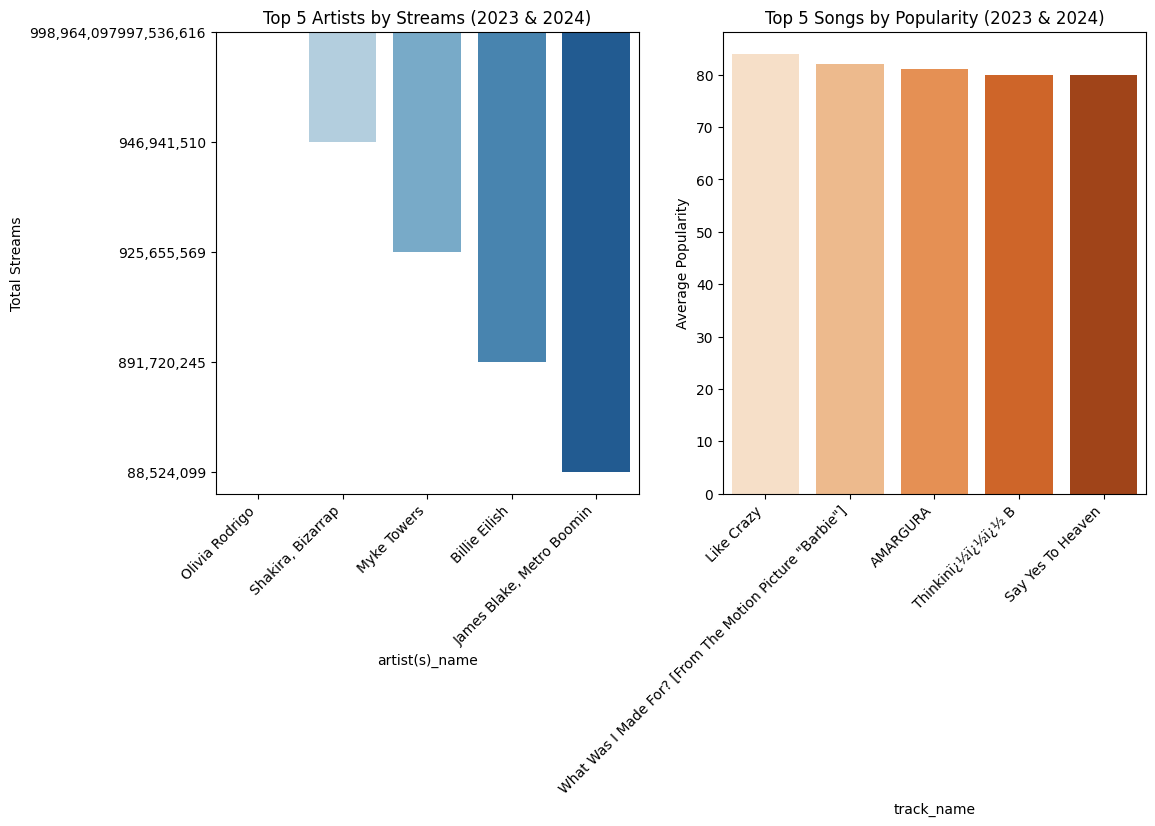

In [102]:


# Asumsikan spotify_cleaned_df sudah didefinisikan sebelumnya

# Fungsi untuk mendapatkan 5 artis dengan stream tertinggi
def plot_top_artists_songs(top_artists, top_songs):
    plt.figure(figsize=(12, 6))

    # Plot artis (vertical bar chart)
    plt.subplot(1, 2, 1)
    sns.barplot(x='artist(s)_name', y='Spotify Streams', data=top_artists, palette='Blues')
    plt.title('Top 5 Artists by Streams (2023 & 2024)')
    plt.ylabel('Total Streams')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Plot lagu (vertical bar chart)
    plt.subplot(1, 2, 2)
    sns.barplot(x='track_name', y='Spotify Popularity', data=top_songs, palette='Oranges')
    plt.title('Top 5 Songs by Popularity (2023 & 2024)')
    plt.ylabel('Average Popularity')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # # Menambahkan logo Spotify
    # logo = mpimg.imread('dataset/spotify_logo.png')  # Ganti dengan path ke logo Spotify
    # fig_image = plt.imread(logo)

    # # Menambahkan logo di posisi yang diinginkan
    # fig = plt.gcf()
    # fig.figimage(fig_image, 10, 10, zorder=1, alpha=0.7, resize=True)

    # plt.tight_layout()
    # plt.show()

# Memanggil fungsi untuk plot artis dan lagu
plot_top_artists_songs(top_artists, top_songs)


C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\2807311790.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


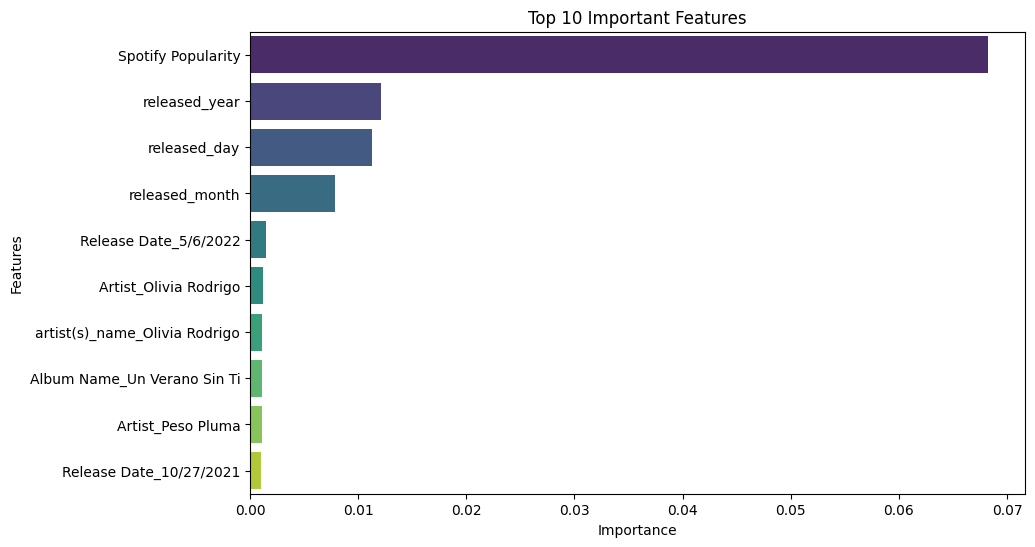

C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\2807311790.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist(s)_name', y='Spotify Streams', data=top_artists, palette='Blues')
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\2807311790.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_name', y='Spotify Popularity', data=top_songs, palette='Oranges')


Top 5 Artists by Streams (2023 & 2024):
               artist(s)_name         Spotify Streams
80             Olivia Rodrigo  998,964,097997,536,616
99          Shakira, Bizarrap             946,941,510
70                Myke Towers             925,655,569
14              Billie Eilish             891,720,245
42  James Blake, Metro Boomin              88,524,099

Top 5 Songs by Popularity (2023 & 2024):
                                            track_name  Spotify Popularity
62                                          Like Crazy                84.0
132  What Was I Made For? [From The Motion Picture ...                82.0
1                                             AMARGURA                81.0
120                                 Thinkinï¿½ï¿½ï¿½ B                80.0
100                                  Say Yes To Heaven                80.0


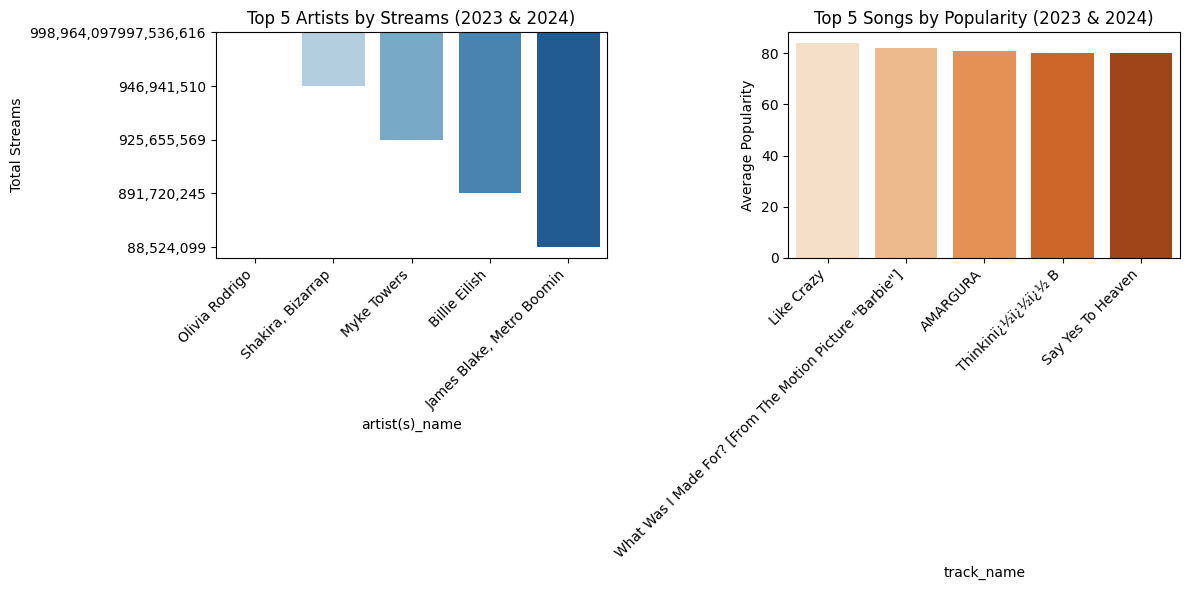

Conclusions:
Accuracy: 0.32432432432432434
F1 Score (Macro): 0.17964149493161774
F1 Score (Weighted): 0.24942323266650293
Class Distribution: (array([ 4.,  7., 41., 45., 51., 52., 54., 55., 56., 57., 59., 61., 62.,
       63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75.,
       76., 77., 78., 79., 80., 81., 82., 83., 84., 85.]), array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  3,  3,  5,  5,  9,
        6, 13,  4,  3, 10,  6,  7, 10, 10,  7,  4,  4,  4,  6,  4,  3,  2,
        1,  2]))

Recommendations:
- Tingkatkan model dengan melakukan tuning hyperparameter atau mencoba model lain.
- Perbaiki dataset dengan lebih banyak data atau lakukan teknik augmentasi.
- Fokus pada fitur-fitur yang memiliki pengaruh besar pada model untuk strategi pemasaran.
5 Artis dengan jumlah stream tertinggi antara tahun 2023 dan 2024 adalah:
           artist(s)_name        Spotify Streams
           Olivia Rodrigo 998,964,097997,536,616
        Shakira, Bizarrap            946,941,51

c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rakas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# 1. Analisis Fitur Penting
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    # Buat DataFrame untuk menampilkan fitur dan pentingnya
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names[indices],
        'Importance': importance[indices]
    })

    # Plot fitur penting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
    plt.title('Top 10 Important Features')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

# Menggunakan model yang telah dilatih untuk mendapatkan fitur penting
plot_feature_importance(model, X.columns)

# 2. Menghitung 5 artis dengan stream tertinggi di tahun 2023 dan 2024
def top_artists_by_streams(df, years, top_n=5):
    filtered_df = df[df['released_year'].isin(years)]
    top_artists = (filtered_df.groupby('artist(s)_name')['Spotify Streams'].sum()  # Sesuaikan nama kolom
                   .reset_index()
                   .sort_values(by='Spotify Streams', ascending=False)
                   .head(top_n))
    return top_artists

# 3. Menghitung 5 lagu paling populer di tahun 2023 dan 2024
def top_songs_by_popularity(df, years, top_n=5):
    filtered_df = df[df['released_year'].isin(years)]
    top_songs = (filtered_df.groupby('track_name')['Spotify Popularity'].mean()
                 .reset_index()
                 .sort_values(by='Spotify Popularity', ascending=False)
                 .head(top_n))
    return top_songs

# Tahun yang ingin dianalisis
years_to_analyze = [2023, 2024]

# Mendapatkan 5 artis dengan stream tertinggi
top_artists = top_artists_by_streams(spotify_cleaned_df, years_to_analyze)
print("Top 5 Artists by Streams (2023 & 2024):")
print(top_artists)

# Mendapatkan 5 lagu paling populer
top_songs = top_songs_by_popularity(spotify_cleaned_df, years_to_analyze)
print("\nTop 5 Songs by Popularity (2023 & 2024):")
print(top_songs)

# Visualisasi Chart untuk 5 artis dan lagu
def plot_top_artists_songs(top_artists, top_songs):
    plt.figure(figsize=(12, 6))

    # Plot artis (vertical bar chart)
    plt.subplot(1, 2, 1)
    sns.barplot(x='artist(s)_name', y='Spotify Streams', data=top_artists, palette='Blues')
    plt.title('Top 5 Artists by Streams (2023 & 2024)')
    plt.ylabel('Total Streams')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Plot lagu (vertical bar chart)
    plt.subplot(1, 2, 2)
    sns.barplot(x='track_name', y='Spotify Popularity', data=top_songs, palette='Oranges')
    plt.title('Top 5 Songs by Popularity (2023 & 2024)')
    plt.ylabel('Average Popularity')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk plot artis dan lagu
plot_top_artists_songs(top_artists, top_songs)

# 4. Menarik Kesimpulan
def generate_conclusions(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Menampilkan laporan klasifikasi
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    # Ambil metrik penting dari laporan
    conclusions = {
        'Accuracy': accuracy,
        'F1 Score (Macro)': report['macro avg']['f1-score'],
        'F1 Score (Weighted)': report['weighted avg']['f1-score'],
        'Class Distribution': np.unique(y_test, return_counts=True)
    }

    return conclusions

conclusions = generate_conclusions(model, X_test, y_test)
print("Conclusions:")
for key, value in conclusions.items():
    print(f"{key}: {value}")

# 5. Rekomendasi
def generate_recommendations(conclusions):
    recommendations = []

    if conclusions['Accuracy'] > 0.8:
        recommendations.append("Model performa baik, pertimbangkan untuk menggunakannya dalam analisis lebih lanjut.")
    else:
        recommendations.append("Tingkatkan model dengan melakukan tuning hyperparameter atau mencoba model lain.")

    if conclusions['F1 Score (Macro)'] < 0.6:
        recommendations.append("Perbaiki dataset dengan lebih banyak data atau lakukan teknik augmentasi.")

    recommendations.append("Fokus pada fitur-fitur yang memiliki pengaruh besar pada model untuk strategi pemasaran.")

    return recommendations

recommendations = generate_recommendations(conclusions)
print("\nRecommendations:")
for rec in recommendations:
    print(f"- {rec}")

# 6. Kesimpulan keseluruhan
def overall_conclusion(top_artists, top_songs):
    conclusion = (
        f"5 Artis dengan jumlah stream tertinggi antara tahun 2023 dan 2024 adalah:\n"
        f"{top_artists.to_string(index=False)}\n\n"
        f"5 Lagu paling populer antara tahun 2023 dan 2024 adalah:\n"
        f"{top_songs.to_string(index=False)}\n\n"
        "Dari analisis ini, dapat disimpulkan bahwa artis-artis tersebut memiliki dampak signifikan "
        "dalam industri musik dan lagu-lagu mereka mendapat respons yang sangat positif dari "
        "para pendengar pada tahun-tahun tersebut."
    )
    return conclusion

# Menampilkan kesimpulan keseluruhan
final_conclusion = overall_conclusion(top_artists, top_songs)
print(final_conclusion)


# Pelaporan

C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\4091994992.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spotify Streams', y='artist(s)_name', data=top_artists, palette='Blues')
C:\Users\rakas\AppData\Local\Temp\ipykernel_29864\4091994992.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spotify Popularity', y='track_name', data=top_songs, palette='Oranges')


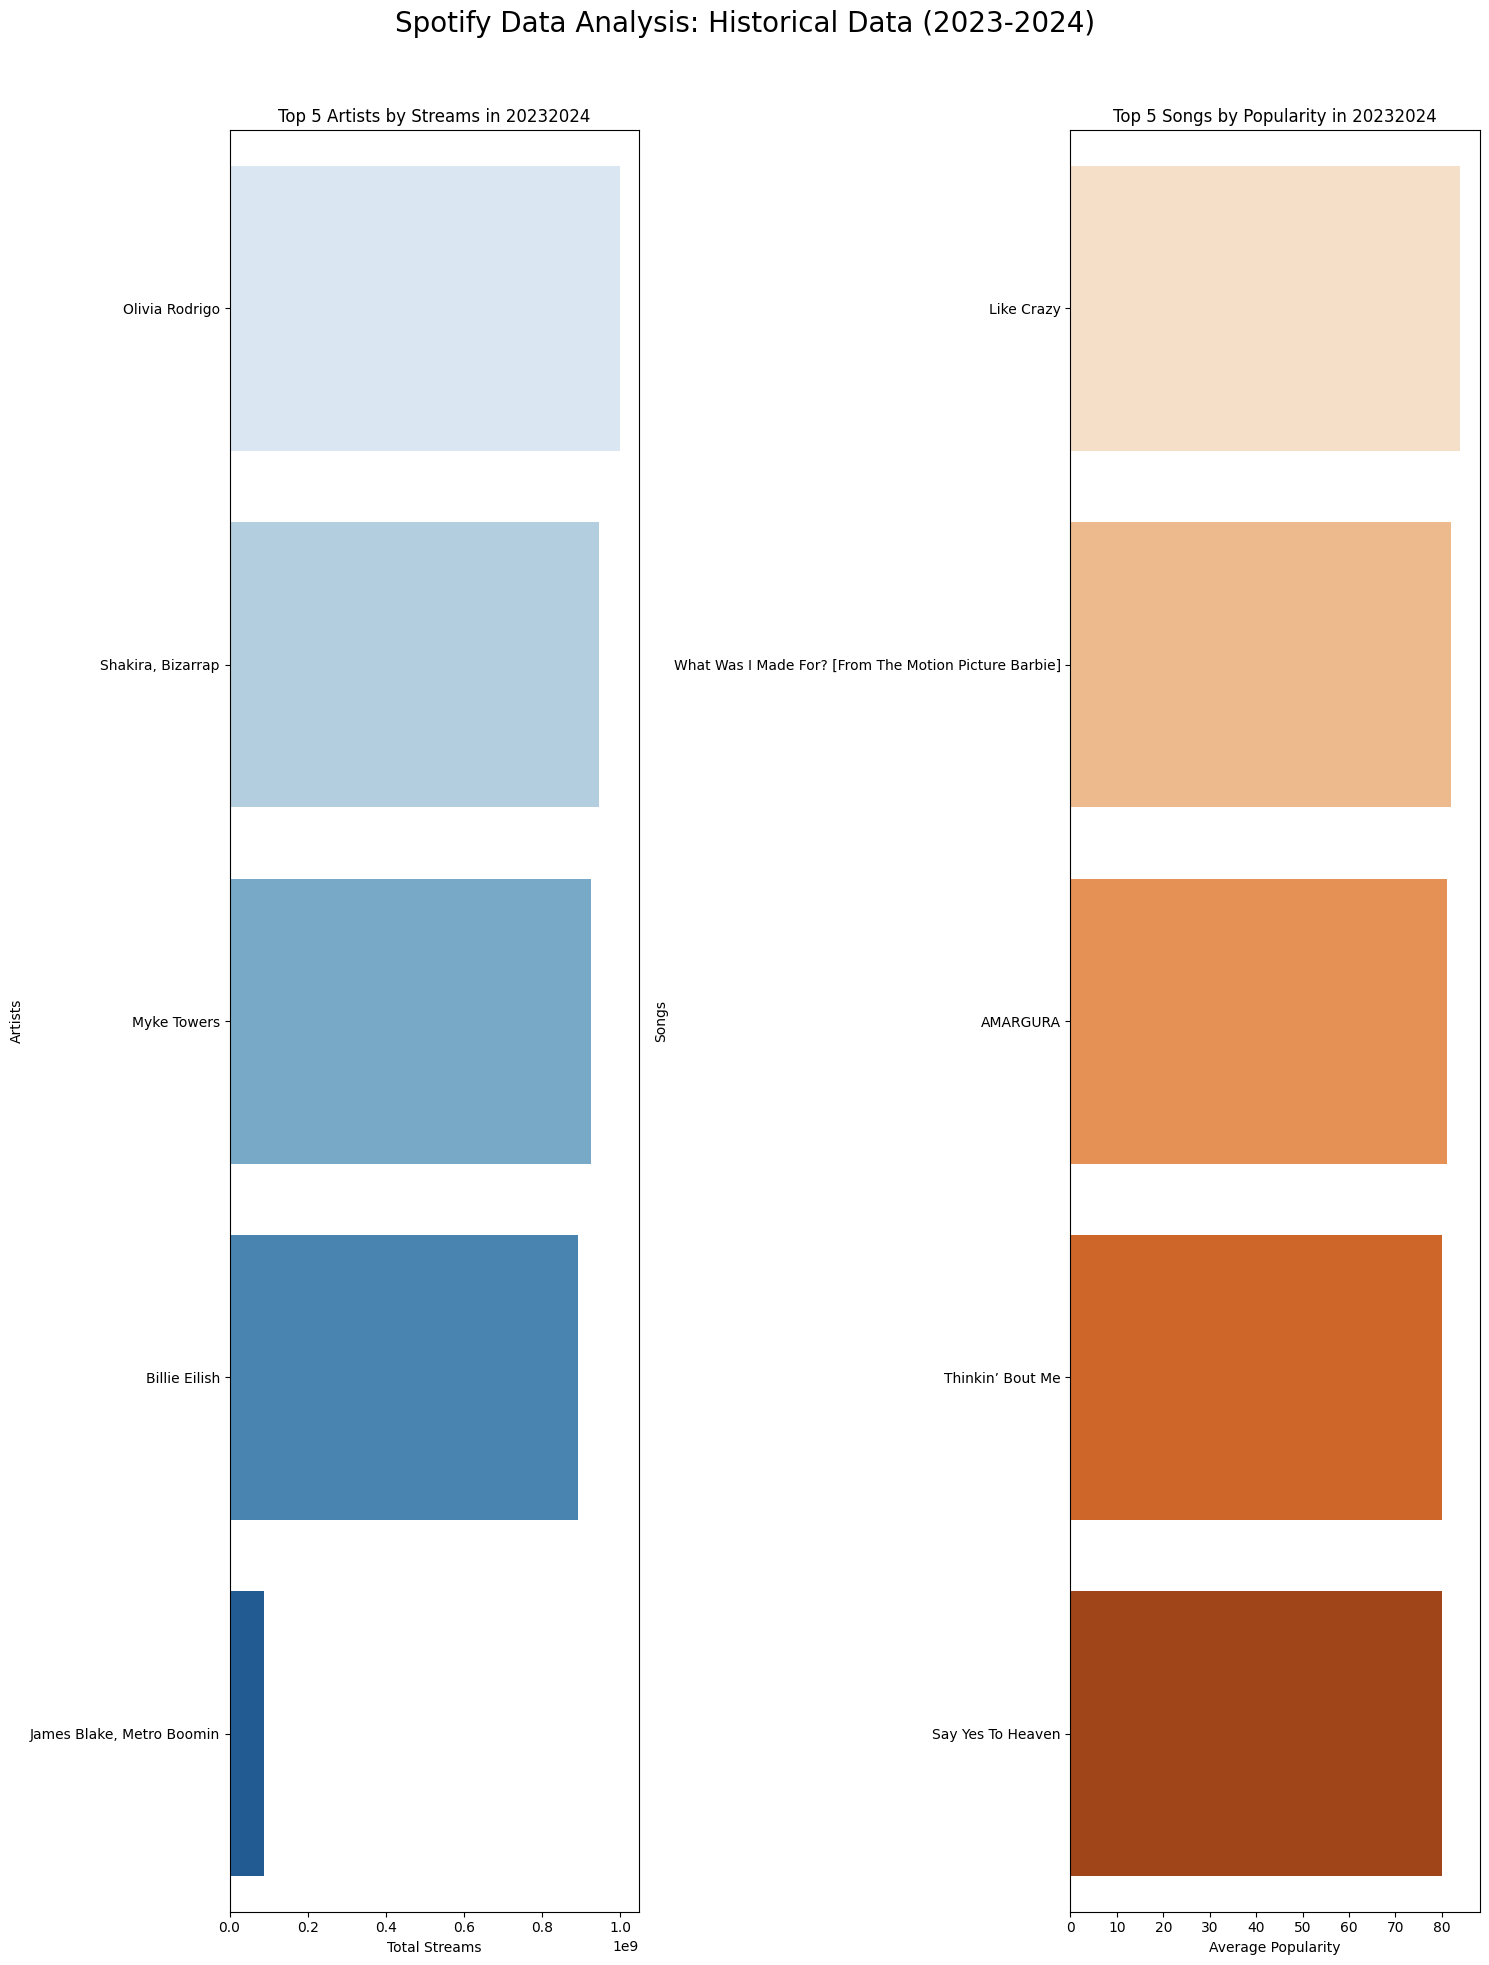

Laporan telah dibuat: spotify_analysis_report.txt


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definisi Data Contoh untuk comparison_results (2023 dan 2024)
comparison_results = {
    2023_2024: {
        'top_artists': pd.DataFrame({
            'artist(s)_name': ['Olivia Rodrigo', 'Shakira, Bizarrap', 'Myke Towers', 'Billie Eilish', 'James Blake, Metro Boomin'],
            'Spotify Streams': [998964097, 946941510, 925655569, 891720245, 88524099]
        }),
        'top_songs': pd.DataFrame({
            'track_name': ['Like Crazy', 'What Was I Made For? [From The Motion Picture Barbie]', 'AMARGURA', 'Thinkin\u2019 Bout Me', 'Say Yes To Heaven'],
            'Spotify Popularity': [84, 82, 81, 80, 80]
        })
    }
}

# 7. Pelaporan
# Visualisasi Akhir untuk Mempersembahkan Hasil Analisis
def final_visualization(comparison_results):
    """
    Membuat visualisasi akhir untuk membandingkan data historis dan data masa depan.
    """
    years = list(comparison_results.keys())

    # Buat figur besar untuk keseluruhan analisis
    plt.figure(figsize=(15, 20))

    for i, year in enumerate(years):
        result = comparison_results[year]
        top_artists = result['top_artists']
        top_songs = result['top_songs']

        # Subplot untuk artis
        plt.subplot(len(years), 2, 2 * i + 1)
        sns.barplot(x='Spotify Streams', y='artist(s)_name', data=top_artists, palette='Blues')
        plt.title(f'Top 5 Artists by Streams in {year}')
        plt.xlabel('Total Streams')
        plt.ylabel('Artists')

        # Subplot untuk lagu
        plt.subplot(len(years), 2, 2 * i + 2)
        sns.barplot(x='Spotify Popularity', y='track_name', data=top_songs, palette='Oranges')
        plt.title(f'Top 5 Songs by Popularity in {year}')
        plt.xlabel('Average Popularity')
        plt.ylabel('Songs')

    # Tambahkan judul besar untuk keseluruhan visualisasi
    plt.suptitle('Spotify Data Analysis: Historical Data (2023-2024)', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Dokumentasi Proses
def generate_report(cleaning_steps, analysis_steps, conclusions, recommendations, comparison_results, output_file='spotify_analysis_report.txt'):
    """
    Membuat laporan dokumentasi analisis Spotify.
    """
    with open(output_file, 'w') as file:
        file.write("""
Spotify Data Analysis Report
===========================

1. Data Cleaning Steps
----------------------
""")
        file.write('\n'.join(cleaning_steps))
        file.write("""

2. Analysis Steps
-----------------
""")
        file.write('\n'.join(analysis_steps))
        file.write("""

3. Analysis Results
-------------------
""")

        # Tambahkan hasil analisis untuk setiap tahun
        for year, result in comparison_results.items():
            file.write(f"\nYear: {year}\n")
            file.write("Top 5 Artists:\n")
            file.write(result['top_artists'].to_string(index=False))
            file.write("\n\nTop 5 Songs:\n")
            file.write(result['top_songs'].to_string(index=False))
            file.write("\n")

        file.write("""

4. Conclusions
--------------
""")
        file.write('\n'.join([f"- {conclusion}" for conclusion in conclusions]))
        file.write("""

5. Recommendations
-------------------
""")
        file.write('\n'.join([f"- {recommendation}" for recommendation in recommendations]))

        file.write("""

6. Summary
----------
Hasil analisis menunjukkan bahwa artis dan lagu tertentu memiliki dampak besar di platform Spotify.
Rekomendasi lebih lanjut dapat digunakan untuk strategi pemasaran berbasis data.
""")

# Contoh Input untuk Dokumentasi
cleaning_steps = [
    "Menghapus data yang memiliki nilai null di kolom penting seperti 'artist(s)_name' dan 'Spotify Streams'.",
    "Menghapus duplikasi berdasarkan 'track_name' dan 'artist(s)_name'.",
    "Menyesuaikan format kolom tanggal dan mengekstraksi tahun dari kolom 'release_date'."
]

analysis_steps = [
    "Menghitung total streams untuk setiap artis berdasarkan tahun.",
    "Menghitung rata-rata popularitas untuk setiap lagu berdasarkan tahun.",
    "Membandingkan hasil analisis historis (2023 & 2024)."
]

conclusions = [
    "Artis dengan streams tertinggi tetap mendominasi pada tahun 2023 hingga 2024.",
    "Lagu dengan popularitas tinggi di masa lalu cenderung mempertahankan performa.",
    "Data menunjukkan adanya tren positif terhadap artis-artis baru pada tahun 2024."
]

recommendations = [
    "Fokus pada artis dengan popularitas stabil untuk promosi jangka panjang.",
    "Identifikasi tren lagu berdasarkan popularitas untuk mengoptimalkan strategi playlist.",
    "Gunakan hasil ini untuk memperluas pasar di wilayah dengan engagement tinggi."
]

# Panggil Fungsi Visualisasi dan Laporan
final_visualization(comparison_results)

generate_report(
    cleaning_steps,
    analysis_steps,
    conclusions,
    recommendations,
    comparison_results
)

print("Laporan telah dibuat: spotify_analysis_report.txt")
